## MAT 653 
#### Wei Li


####  Sample from exp(1) using probability integral transform

ref. example 2.1 of R.C.

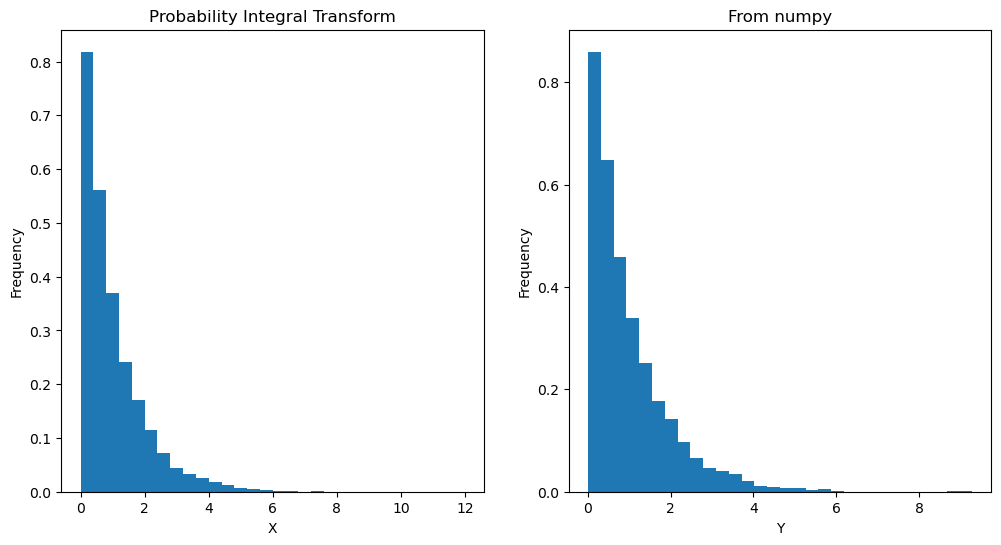

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(2023)

# Number of random variables
Nsim = 10**4

# Generate uniformly distributed random variables
U = np.random.uniform(0, 1, Nsim)

# Transform uniform random variables to exponential random variables
X = -np.log(U)

# Generate exponential random variables using numpy
Y = np.random.exponential(scale=1.0, size=Nsim)

# Create plots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Histogram of X using probability integral transform
axs[0].hist(X, bins=30, density=True)
axs[0].set_title("Probability Integral Transform")
axs[0].set_xlabel("X")
axs[0].set_ylabel("Frequency")

# Histogram of Y generated directly
axs[1].hist(Y, bins=30, density=True)
axs[1].set_title("From numpy")
axs[1].set_xlabel("Y")
axs[1].set_ylabel("Frequency")

# Show plots
plt.show()

#### Sample from beta(2.7,6.3) using accept-and-reject method

ref. example 2.7 of R.C.

We use uniform(0, 1) as the auxillary distribution.

In [33]:
import numpy as np
from scipy.optimize import minimize_scalar
from scipy.stats import beta
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(2023)


# Function to optimize for finding the maximum value of Beta PDF
def neg_beta_pdf(x):
    return -beta.pdf(x, 2.7, 6.3)


# Optimize to find the maximum of the Beta PDF
result = minimize_scalar(neg_beta_pdf, bounds=(0, 1), method="bounded")
M = -result.fun
print(M)

2.669744011149119


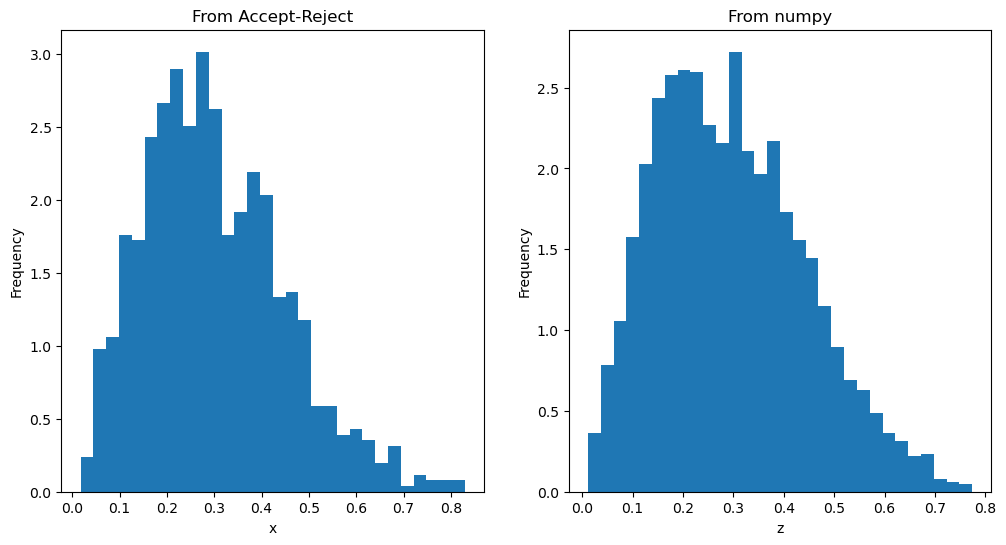

Number of accepted samples: 943


In [34]:
# Number of simulations
Nsim = 2500

# Shape parameters for Beta distribution
a = 2.7
b = 6.3

# Uniform samples over (0, M)
u = np.random.uniform(0, M, Nsim)

# Samples from uniform distribution g(y)
y = np.random.uniform(0, 1, Nsim)

# Accepted subsample using Accept-Reject method
x = y[u < beta.pdf(y, a, b)]

# Directly generated sample from a Beta distribution
z = np.random.beta(2.6, 6.3, Nsim)

# Create plots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Histogram of x generated by Accept-Reject method
axs[0].hist(x, bins=30, density=True)
axs[0].set_title("From Accept-Reject")
axs[0].set_xlabel("x")
axs[0].set_ylabel("Frequency")

# Histogram of z directly generated
axs[1].hist(z, bins=30, density=True)
axs[1].set_title("From numpy")
axs[1].set_xlabel("z")
axs[1].set_ylabel("Frequency")

# Show plots
plt.show()

# Output the number of accepted samples
output_num = len(x)
print(f"Number of accepted samples: {output_num}")

#### Sample from beta(2.7,6.3) using the fundamental theorem


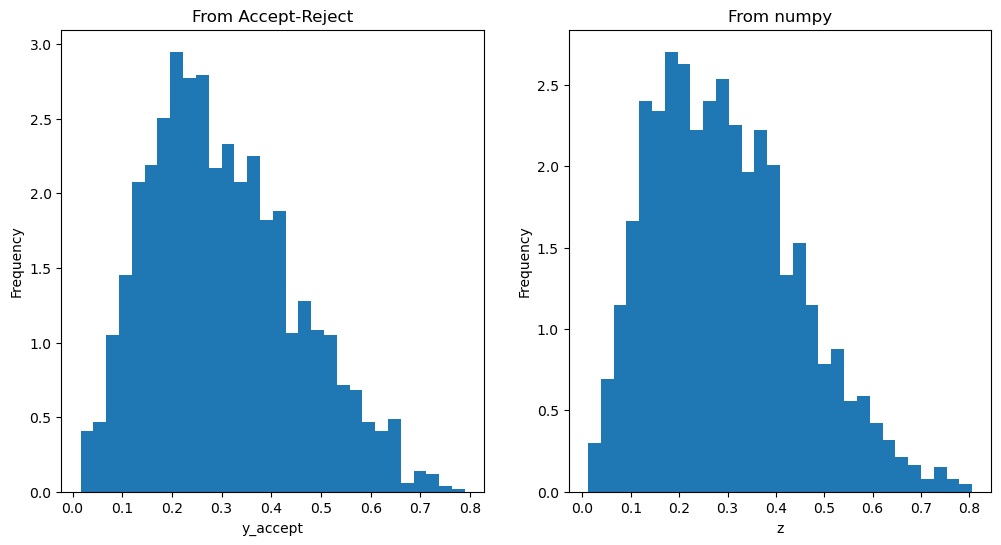

In [35]:
import numpy as np
from scipy.optimize import minimize_scalar
from scipy.stats import beta
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(2023)


# Function to optimize for finding the maximum value of Beta PDF
def neg_beta_pdf(x):
    return -beta.pdf(x, 2.7, 6.3)


# Optimize to find the maximum of the Beta PDF
result = minimize_scalar(neg_beta_pdf, bounds=(0, 1), method="bounded")
M = -result.fun

# Shape parameters for Beta distribution
a = 2.7
b = 6.3

# Number of simulations (for directly generated sample)
Nsim = 2500

# Accepted subsample using Accept-Reject method
y_accept = []
num_accept = 0

# Assuming output_num is previously defined, for example, as the length of another accepted sample
output_num = 2000  # Replace with the actual value

while num_accept < output_num:
    y = np.random.uniform(0, 1)  # Generate from g
    u = np.random.uniform(0, M)  # g(y) = 1 throughout
    if u < beta.pdf(y, a, b):
        y_accept.append(y)
        num_accept += 1
    # print(num_accept)

# Directly generated sample from a Beta distribution
z = np.random.beta(2.6, 6.3, Nsim)

# Create plots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Histogram of y_accept generated by Accept-Reject method
axs[0].hist(y_accept, bins=30, density=True)
axs[0].set_title("From Accept-Reject")
axs[0].set_xlabel("y_accept")
axs[0].set_ylabel("Frequency")

# Histogram of z directly generated
axs[1].hist(z, bins=30, density=True)
axs[1].set_title("From numpy")
axs[1].set_xlabel("z")
axs[1].set_ylabel("Frequency")

# Show plots
plt.show()

#### Importance sampling estimators for P(Z>4.5)

ref. example 3.5 of R.C.

P(Z < -4.5) = 3.3976731247300543e-06


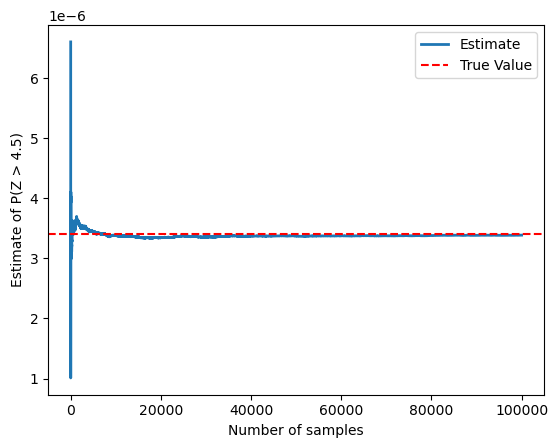

In [36]:
import numpy as np
from scipy.stats import norm, expon
import matplotlib.pyplot as plt

# Compute the probability for P(Z < -4.5)
prob_Z_lt_neg_4_5 = norm.cdf(-4.5)
print(f"P(Z < -4.5) = {prob_Z_lt_neg_4_5}")

# Number of simulations
Nsim = 10**5

# Generate samples from a shifted exponential distribution
y = np.random.exponential(scale=1.0, size=Nsim) + 4.5

# Calculate importance sampling weights
weit = norm.pdf(y) / expon.pdf(y - 4.5, scale=1.0)

# Calculate cumulative mean of importance weights
cum_mean_weit = np.cumsum(weit) / np.arange(1, Nsim + 1)

# Plot the cumulative mean of importance weights
plt.plot(cum_mean_weit, label="Estimate", linestyle="-", linewidth=2)
plt.axhline(y=prob_Z_lt_neg_4_5, color="red", linestyle="--", label="True Value")
plt.xlabel("Number of samples")
plt.ylabel("Estimate of P(Z > 4.5)")
plt.legend()
plt.show()

#### Self-normalized importance sampling

Suppose $X$ has p.d.f. proportional to $exp(-x^2/2)\{(sin(6x))^2+3(cos(x))^2(sin(4x))^2+1\}$. Our goal is to estimate the normalizing constant, estimate $E(X)$, and draw samples from the p.d.f of $X$.

We use $g\sim N(0,1)$ as the auxillary distribution.


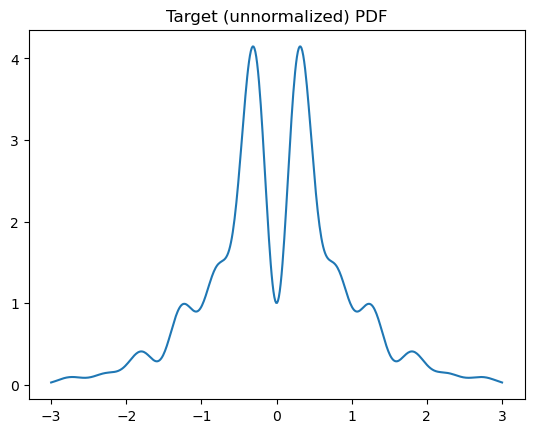

In [37]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


# Define the target PDF
def fp(x):
    return np.exp(-(x**2) / 2) * (
        np.sin(6 * x) ** 2 + 3 * (np.cos(x) ** 2) * (np.sin(4 * x) ** 2) + 1
    )


# Plot the target PDF
x_vals = np.linspace(-3, 3, 500)
plt.figure()
plt.plot(x_vals, fp(x_vals))
plt.title("Target (unnormalized) PDF")
plt.show()

# Number of samples
N = 50000


# Importance sampling function
def w(x):
    return fp(x) / norm.pdf(x)


# Generate samples from proposal distribution (standard normal)
x_samples = np.random.normal(0, 1, N)

# Compute cumulative sum of w(x)
cumulative_w = np.cumsum(w(x_samples))

# Compute the cumulative estimate of the normalizing constant
cumulative_norm_const = cumulative_w / np.arange(1, N + 1)

5.886955878419951 0.16986707912415988


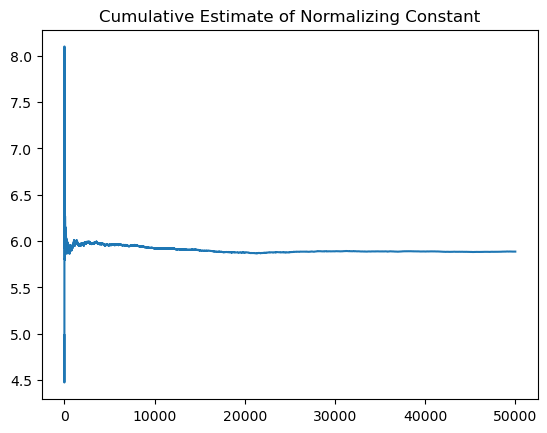

In [38]:
# estimate normalizing constant

print(cumulative_norm_const[-1], 1 / cumulative_norm_const[-1])

# Plot cumulative estimate of norm_const
plt.figure()
plt.plot(cumulative_norm_const)
plt.title("Cumulative Estimate of Normalizing Constant")
plt.show()

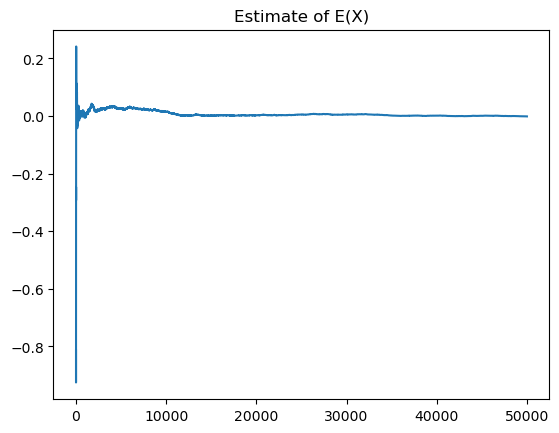

Last 10 estimates: [-0.00145131 -0.00145579 -0.00144445 -0.0014434  -0.00143557 -0.00145534
 -0.00145073 -0.00145366 -0.00148221 -0.00146959]


In [39]:
# Estimate E(X) using self-normalized importance sampling
est = np.cumsum(w(x_samples) * x_samples) / np.cumsum(w(x_samples))

# Plot estimate of E(X)
plt.figure()
plt.plot(est)
plt.title("Estimate of E(X)")
plt.show()

# Print the last 10 estimates
print("Last 10 estimates:", est[-10:])

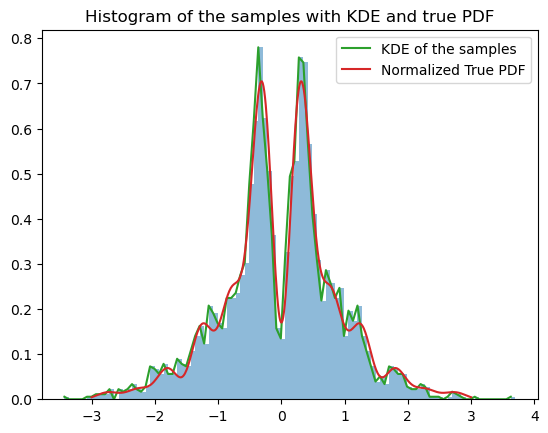

In [40]:
# Generate samples using self-normalized importance sampling
w_hat = w(x_samples) / np.sum(w(x_samples))
x_sim = np.random.choice(x_samples, size=2500, replace=True, p=w_hat)

# Plot histogram of the samples with kernel density estimate
plt.figure()
plt.hist(x_sim, bins=100, density=True, alpha=0.5)
kde_vals = plt.hist(x_sim, bins=100, density=True, alpha=0)
plt.plot(kde_vals[1][:-1], kde_vals[0], label="KDE of the samples")
plt.plot(x_vals, fp(x_vals) / cumulative_norm_const[-1], label="Normalized True PDF")
plt.legend()
plt.title("Histogram of the samples with KDE and true PDF")
plt.show()